Data from http://ai-benchmark.com/alpha

In [1]:
import numpy as np
import pandas as pd

from scipy import linalg

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
cards = pd.read_csv("benchmark-ai.csv", header=None, index_col=0)

In [3]:
cols = [
    "MobileNet-V2-I50", "MobileNet-V2-T50",
    "Inception-V3-I20", "Inception-V3-T20",
    "Inception-V4-I10", "Inception-V4-T10",
    "Inc-ResNet-V2-I10", "Inc-ResNet-V2-I8",
    "ResNet-V2-50-I10", "ResNet-V2-50-T10",
    "ResNet-V2-152-I10", "ResNet-V2-152-T10",
    "VGG-16-I10", "VGG-16-T3",
    "SRCNN 9-5-5-I10", "SRCNN 9-5-5-I1", "SRCNN 9-5-5-T10",
    "VGG-19 Super-Res-I10", "VGG-19 Super-Res-I1", "VGG-19 Super-Res-T10",
    "ResNet-SRGAN-I10", "ResNet-SRGAN-I1", "ResNet-SRGAN-T5",
    "ResNet-DPED-I10", "ResNet-DPED-I1", "ResNet-DPED-T15",
    "U-Net-I4", "U-Net-I1", "U-Net-T4",
    "Nvidia-SPADE-I5", "Nvidia-SPADE-T1",
    "ICNet-I5", "ICNet-T10",
    "PSPNet-I5", "PSPNet-T1",
    "DeepLab-I2", "DeepLab-T1",
    "Pixel-RNN-I50", "Pixel-RNN-T10",
    "LSTM-I100", "LSTM-T10",
    "GNMT-I1"]

In [4]:
cards.columns = cols

In [5]:
cards.head()

,MobileNet-V2-I50,MobileNet-V2-T50,Inception-V3-I20,Inception-V3-T20,Inception-V4-I10,Inception-V4-T10,Inc-ResNet-V2-I10,Inc-ResNet-V2-I8,ResNet-V2-50-I10,ResNet-V2-50-T10,...,ICNet-T10,PSPNet-I5,PSPNet-T1,DeepLab-I2,DeepLab-T1,Pixel-RNN-I50,Pixel-RNN-T10,LSTM-I100,LSTM-T10,GNMT-I1
0,,,,,,,,,,,,,,,,,,,,,
Tesla V100,53,126,49,163,44,181,57,199,27,89,...,616,264,113,75,107,551,1646,543,690,188
GeForce RTX 2080 Ti (1),29,177,43,154,42,161,56,173,29,96,...,234,303,120,87,101,267,714,451,780,132
GeForce RTX 2080 Ti (2),37,177,55,161,48,168,60,187,36,101,...,316,291,119,84,108,405,850,512,822,129
TITAN RTX,35,185,47,166,46,178,58,191,32,104,...,329,296,125,86,108,492,1164,472,726,143
Quadro RTX 6000,33,202,49,182,49,194,64,206,35,113,...,254,332,130,94,111,270,720,420,750,126


In [6]:
cards / cards.loc["Tesla V100"]

,MobileNet-V2-I50,MobileNet-V2-T50,Inception-V3-I20,Inception-V3-T20,Inception-V4-I10,Inception-V4-T10,Inc-ResNet-V2-I10,Inc-ResNet-V2-I8,ResNet-V2-50-I10,ResNet-V2-50-T10,...,ICNet-T10,PSPNet-I5,PSPNet-T1,DeepLab-I2,DeepLab-T1,Pixel-RNN-I50,Pixel-RNN-T10,LSTM-I100,LSTM-T10,GNMT-I1
0,,,,,,,,,,,,,,,,,,,,,
Tesla V100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
GeForce RTX 2080 Ti (1),0.547170,1.404762,0.877551,0.944785,0.954545,0.889503,0.982456,0.869347,1.074074,1.078652,...,0.379870,1.147727,1.061947,1.160000,0.943925,0.484574,0.433779,0.830571,1.130435,0.702128
GeForce RTX 2080 Ti (2),0.698113,1.404762,1.122449,0.987730,1.090909,0.928177,1.052632,0.939698,1.333333,1.134831,...,0.512987,1.102273,1.053097,1.120000,1.009346,0.735027,0.516403,0.942910,1.191304,0.686170
TITAN RTX,0.660377,1.468254,0.959184,1.018405,1.045455,0.983425,1.017544,0.959799,1.185185,1.168539,...,0.534091,1.121212,1.106195,1.146667,1.009346,0.892922,0.707169,0.869245,1.052174,0.760638
Quadro RTX 6000,0.622642,1.603175,1.000000,1.116564,1.113636,1.071823,1.122807,1.035176,1.296296,1.269663,...,0.412338,1.257576,1.150442,1.253333,1.037383,0.490018,0.437424,0.773481,1.086957,0.670213
GeForce RTX 2080 SUPER,0.622642,1.666667,1.122449,1.294479,1.227273,1.248619,1.228070,1.236181,1.407407,1.483146,...,0.420455,1.541667,1.513274,1.520000,1.383178,0.528131,0.404010,0.710866,1.110145,0.904255
TITAN Xp,0.849057,1.873016,1.367347,1.441718,1.409091,1.331492,1.385965,1.296482,1.555556,1.606742,...,0.756494,1.621212,1.539823,1.506667,1.383178,0.491833,0.380923,0.773481,0.733333,0.803191
GeForce RTX 2080,0.698113,1.555556,1.102041,1.257669,1.250000,1.149171,1.263158,1.155779,1.370370,1.415730,...,0.636364,1.666667,1.557522,1.586667,1.289720,0.548094,0.431349,1.101289,1.271014,1.319149
GeForce RTX 2070 SUPER (1),1.396226,1.373016,1.306122,1.331288,1.340909,1.237569,1.368421,1.185930,1.444444,1.449438,...,0.631494,1.693182,1.530973,1.640000,1.280374,0.506352,0.467193,1.022099,0.952174,0.771277


In [7]:
log_cards = np.log2(cards)
log_cards

,MobileNet-V2-I50,MobileNet-V2-T50,Inception-V3-I20,Inception-V3-T20,Inception-V4-I10,Inception-V4-T10,Inc-ResNet-V2-I10,Inc-ResNet-V2-I8,ResNet-V2-50-I10,ResNet-V2-50-T10,...,ICNet-T10,PSPNet-I5,PSPNet-T1,DeepLab-I2,DeepLab-T1,Pixel-RNN-I50,Pixel-RNN-T10,LSTM-I100,LSTM-T10,GNMT-I1
0,,,,,,,,,,,,,,,,,,,,,
Tesla V100,5.727920,6.977280,5.614710,7.348728,5.459432,7.499846,5.832890,7.636625,4.754888,6.475733,...,9.266787,8.044394,6.820179,6.228819,6.741467,9.105909,10.684749,9.084808,9.430453,7.554589
GeForce RTX 2080 Ti (1),4.857981,7.467606,5.426265,7.266787,5.392317,7.330917,5.807355,7.434628,4.857981,6.584963,...,7.870365,8.243174,6.906891,6.442943,6.658211,8.060696,9.479780,8.816984,9.607330,7.044394
GeForce RTX 2080 Ti (2),5.209453,7.467606,5.781360,7.330917,5.584963,7.392317,5.906891,7.546894,5.169925,6.658211,...,8.303781,8.184875,6.894818,6.392317,6.754888,8.661778,9.731319,9.000000,9.682995,7.011227
TITAN RTX,5.129283,7.531381,5.554589,7.375039,5.523562,7.475733,5.857981,7.577429,5.000000,6.700440,...,8.361944,8.209453,6.965784,6.426265,6.754888,8.942515,10.184875,8.882643,9.503826,7.159871
Quadro RTX 6000,5.044394,7.658211,5.614710,7.507795,5.614710,7.599913,6.000000,7.686501,5.129283,6.820179,...,7.988685,8.375039,7.022368,6.554589,6.794416,8.076816,9.491853,8.714246,9.550747,6.977280
GeForce RTX 2080 SUPER,5.044394,7.714246,5.781360,7.721099,5.754888,7.820179,6.129283,7.942515,5.247928,7.044394,...,8.016808,8.668885,7.417853,6.832890,7.209453,8.184875,9.377211,8.592457,9.581201,7.409391
TITAN Xp,5.491853,7.882643,6.066089,7.876517,5.954196,7.912889,6.303781,8.011227,5.392317,7.159871,...,8.864186,8.741467,7.442943,6.820179,7.209453,8.082149,9.292322,8.714246,8.982994,7.238405
GeForce RTX 2080,5.209453,7.614710,5.754888,7.679480,5.781360,7.700440,6.169925,7.845490,5.209453,6.977280,...,8.614710,8.781360,7.459432,6.894818,7.108524,8.238405,9.471675,9.224002,9.776433,7.954196
GeForce RTX 2070 SUPER (1),6.209453,7.434628,6.000000,7.761551,5.882643,7.807355,6.285402,7.882643,5.285402,7.011227,...,8.603626,8.804131,7.434628,6.942515,7.098032,8.124121,9.586840,9.116344,9.359750,7.179909


In [8]:
# cleaning a very inconsequent row
log_cards = log_cards.drop('Intel Core i3-6006U')

In [9]:
task_factor = log_cards.mean(axis='rows')

In [10]:
log_cards_2 = log_cards - task_factor

In [11]:
card_factor = log_cards_2.mean(axis='columns')

In [12]:
card_factor

0
Tesla V100                   -3.464346
GeForce RTX 2080 Ti (1)      -3.433612
GeForce RTX 2080 Ti (2)      -3.355006
TITAN RTX                    -3.359688
Quadro RTX 6000              -3.319154
GeForce RTX 2080 SUPER       -3.107589
TITAN Xp                     -3.071909
GeForce RTX 2080             -3.015529
GeForce RTX 2070 SUPER (1)   -2.999006
GeForce GTX 1080 Ti (1)      -2.950847
Tesla P100                   -2.889763
GeForce RTX 2070 SUPER (2)   -2.833328
GeForce RTX 2060 SUPER       -2.794503
TITAN X Pascal               -2.794512
GeForce GTX 1080 Ti (2)      -2.790797
GeForce GTX 1080 Ti (3)      -2.786620
TITAN Xp CE                  -2.776495
GeForce RTX 2070             -2.661767
Tesla P40                    -2.611480
Quadro RTX 4000              -2.555122
GeForce RTX 2060             -2.551956
GeForce GTX 1080             -2.544016
GeForce RTX 2070 Max-Q       -2.325016
GeForce GTX TITAN X          -2.321563
GeForce GTX 1070             -2.292920
Tesla T4 (1)           

In [13]:
cards_debiased = log_cards_2.subtract(card_factor, axis=0)

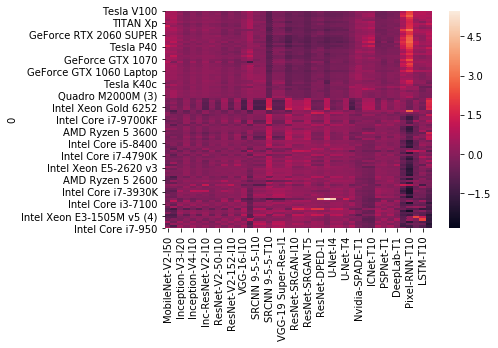

In [14]:
sns.heatmap(cards_debiased)

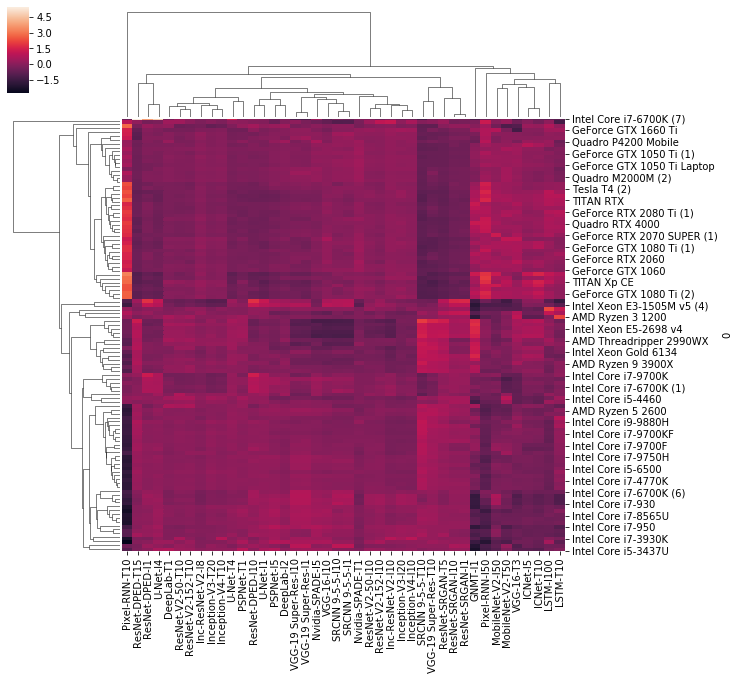

In [15]:
sns.clustermap(cards_debiased)

In [16]:
linalg.svd(cards_debiased.values)

(array([[-0.20919554,  0.02540562, -0.0032415 , ..., -0.06207108,
          0.17640632,  0.09270929],
        [-0.12240605, -0.00579959,  0.00550638, ...,  0.13311333,
          0.09733257,  0.06522584],
        [-0.14578297, -0.00685466,  0.00157003, ..., -0.22433236,
         -0.09921719, -0.12404603],
        ...,
        [ 0.09786581, -0.15230752, -0.0556417 , ...,  0.7228897 ,
          0.00924375, -0.01406768],
        [ 0.15253162, -0.09621728, -0.10792788, ..., -0.01712476,
          0.52344372,  0.01423096],
        [ 0.10376526, -0.1150939 , -0.02424882, ...,  0.00710098,
          0.06907227,  0.2801349 ]]),
 array([2.63381133e+01, 1.57278591e+01, 9.82567975e+00, 7.17447925e+00,
        6.84332361e+00, 5.27090032e+00, 4.45524002e+00, 4.30629108e+00,
        3.44367848e+00, 3.19275967e+00, 2.84026210e+00, 2.77955098e+00,
        2.42318402e+00, 2.24801410e+00, 1.98550207e+00, 1.84408874e+00,
        1.61706362e+00, 1.46099580e+00, 1.35698365e+00, 1.25355103e+00,
        1.137

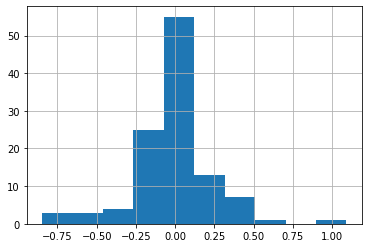

In [17]:
cards_debiased.iloc[:,10].hist()

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(log_cards_2)

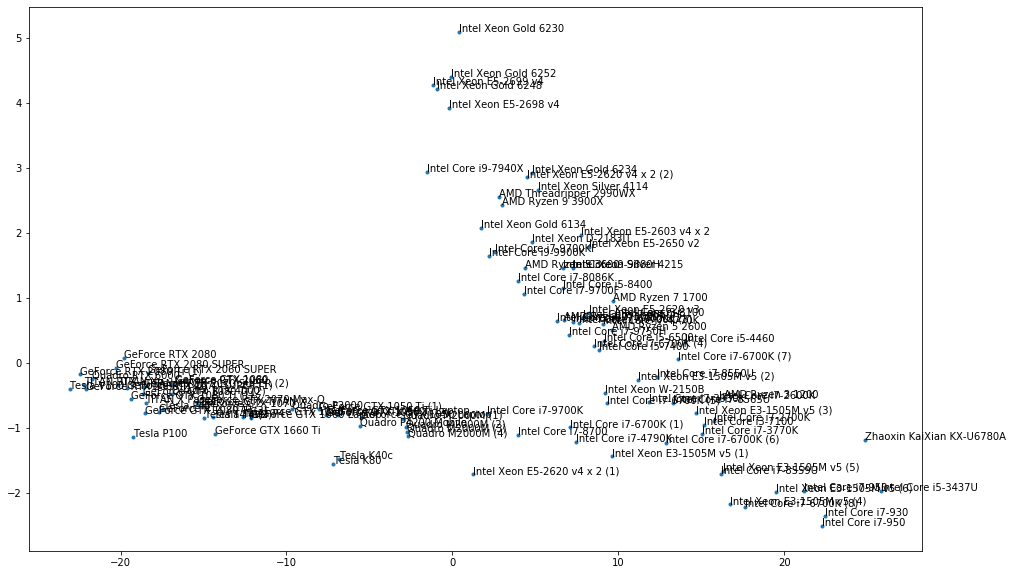

In [19]:
plt.figure(figsize=(16, 10))
plt.plot(X_pca[:, 0], X_pca[:, 1], '.')
for i, name in enumerate(log_cards_2.index):
    plt.annotate(name, X_pca[i])

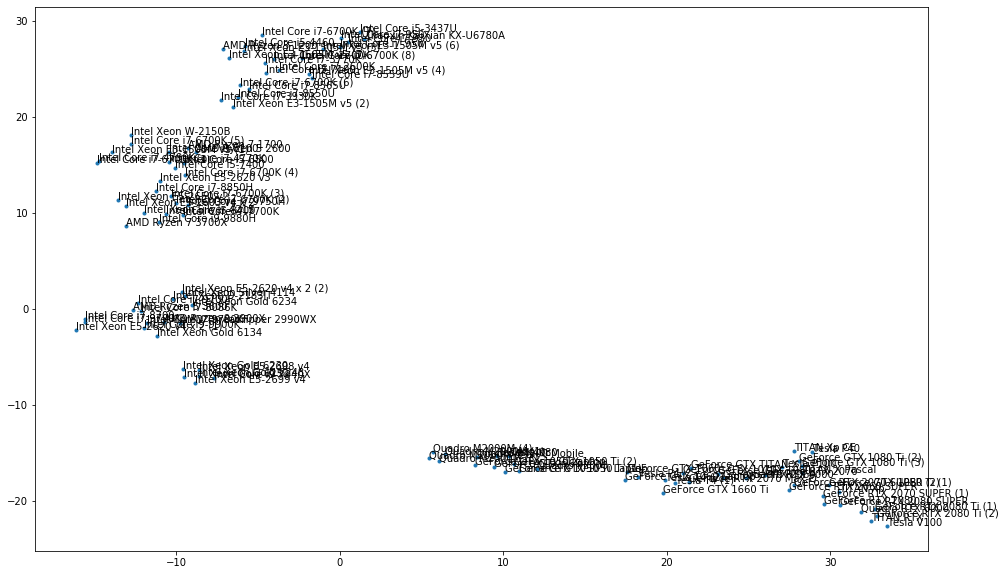

In [20]:
tsne = TSNE(n_components=2, perplexity=10.)
X_tsne = tsne.fit_transform(log_cards_2)

plt.figure(figsize=(16, 10))
plt.plot(X_tsne[:, 0], X_tsne[:, 1], '.')
for i, name in enumerate(log_cards_2.index):
    plt.annotate(name, X_tsne[i])

## GPUs only

In [21]:
gpu_names = [name for name in cards.index if "Intel" not in name and "AMD" not in name and "Zhaoxin" not in name]
gpu_names

['Tesla V100',
 'GeForce RTX 2080 Ti (1)',
 'GeForce RTX 2080 Ti (2)',
 'TITAN RTX',
 'Quadro RTX 6000',
 'GeForce RTX 2080 SUPER',
 'TITAN Xp',
 'GeForce RTX 2080',
 'GeForce RTX 2070 SUPER (1)',
 'GeForce GTX 1080 Ti (1)',
 'Tesla P100',
 'GeForce RTX 2070 SUPER (2)',
 'GeForce RTX 2060 SUPER',
 'TITAN X Pascal',
 'GeForce GTX 1080 Ti (2)',
 'GeForce GTX 1080 Ti (3)',
 'TITAN Xp CE',
 'GeForce RTX 2070',
 'Tesla P40',
 'Quadro RTX 4000',
 'GeForce RTX 2060',
 'GeForce GTX 1080',
 'GeForce RTX 2070 Max-Q',
 'GeForce GTX TITAN X',
 'GeForce GTX 1070',
 'Tesla T4 (1)',
 'GeForce GTX 1660 Ti',
 'Tesla T4 (2)',
 'Tesla P4',
 'GeForce GTX 1060',
 'GeForce GTX 1060 Laptop',
 'Quadro P2000',
 'GeForce GTX 1050 Ti (1)',
 'GeForce GTX 1050 Ti (2)',
 'GeForce GTX 1050 Ti Laptop',
 'Tesla K80',
 'Tesla K40c',
 'GeForce GTX 960',
 'Quadro P4200 Mobile',
 'GeForce GTX 1050 Laptop',
 'Quadro M2000M (1)',
 'Quadro M2000M (2)',
 'Quadro M2000M (3)',
 'Quadro M2000M (4)']

In [22]:
log_gpus = np.log2(cards.loc[gpu_names])
log_gpus

,MobileNet-V2-I50,MobileNet-V2-T50,Inception-V3-I20,Inception-V3-T20,Inception-V4-I10,Inception-V4-T10,Inc-ResNet-V2-I10,Inc-ResNet-V2-I8,ResNet-V2-50-I10,ResNet-V2-50-T10,...,ICNet-T10,PSPNet-I5,PSPNet-T1,DeepLab-I2,DeepLab-T1,Pixel-RNN-I50,Pixel-RNN-T10,LSTM-I100,LSTM-T10,GNMT-I1
0,,,,,,,,,,,,,,,,,,,,,
Tesla V100,5.727920,6.977280,5.614710,7.348728,5.459432,7.499846,5.832890,7.636625,4.754888,6.475733,...,9.266787,8.044394,6.820179,6.228819,6.741467,9.105909,10.684749,9.084808,9.430453,7.554589
GeForce RTX 2080 Ti (1),4.857981,7.467606,5.426265,7.266787,5.392317,7.330917,5.807355,7.434628,4.857981,6.584963,...,7.870365,8.243174,6.906891,6.442943,6.658211,8.060696,9.479780,8.816984,9.607330,7.044394
GeForce RTX 2080 Ti (2),5.209453,7.467606,5.781360,7.330917,5.584963,7.392317,5.906891,7.546894,5.169925,6.658211,...,8.303781,8.184875,6.894818,6.392317,6.754888,8.661778,9.731319,9.000000,9.682995,7.011227
TITAN RTX,5.129283,7.531381,5.554589,7.375039,5.523562,7.475733,5.857981,7.577429,5.000000,6.700440,...,8.361944,8.209453,6.965784,6.426265,6.754888,8.942515,10.184875,8.882643,9.503826,7.159871
Quadro RTX 6000,5.044394,7.658211,5.614710,7.507795,5.614710,7.599913,6.000000,7.686501,5.129283,6.820179,...,7.988685,8.375039,7.022368,6.554589,6.794416,8.076816,9.491853,8.714246,9.550747,6.977280
GeForce RTX 2080 SUPER,5.044394,7.714246,5.781360,7.721099,5.754888,7.820179,6.129283,7.942515,5.247928,7.044394,...,8.016808,8.668885,7.417853,6.832890,7.209453,8.184875,9.377211,8.592457,9.581201,7.409391
TITAN Xp,5.491853,7.882643,6.066089,7.876517,5.954196,7.912889,6.303781,8.011227,5.392317,7.159871,...,8.864186,8.741467,7.442943,6.820179,7.209453,8.082149,9.292322,8.714246,8.982994,7.238405
GeForce RTX 2080,5.209453,7.614710,5.754888,7.679480,5.781360,7.700440,6.169925,7.845490,5.209453,6.977280,...,8.614710,8.781360,7.459432,6.894818,7.108524,8.238405,9.471675,9.224002,9.776433,7.954196
GeForce RTX 2070 SUPER (1),6.209453,7.434628,6.000000,7.761551,5.882643,7.807355,6.285402,7.882643,5.285402,7.011227,...,8.603626,8.804131,7.434628,6.942515,7.098032,8.124121,9.586840,9.116344,9.359750,7.179909


In [23]:
log_gpus_speed = - (log_gpus - log_gpus.mean())

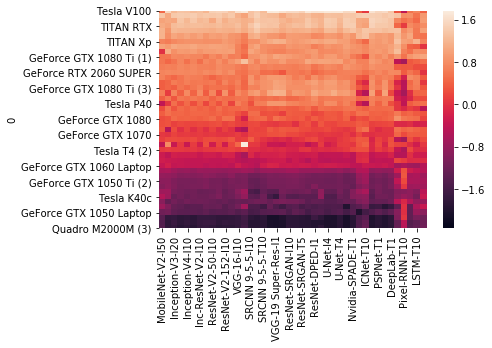

In [24]:
sns.heatmap(log_gpus_speed)

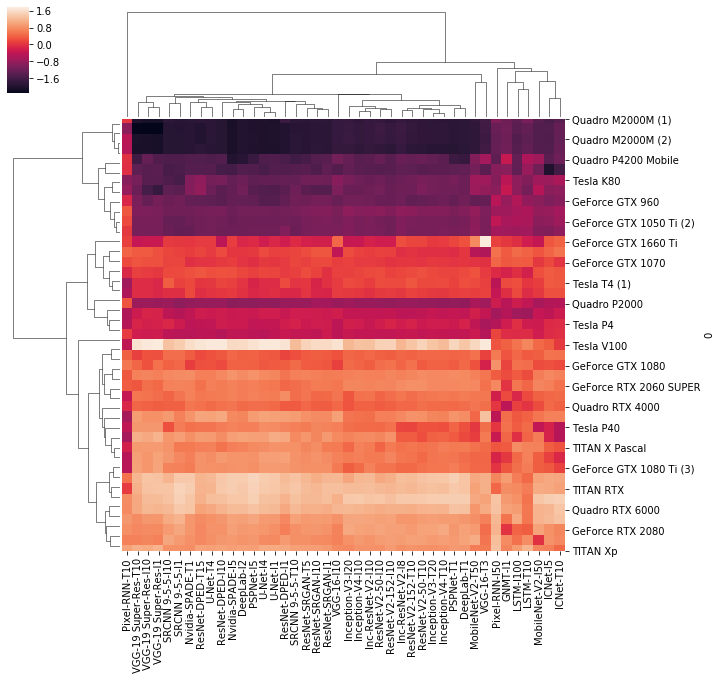

In [25]:
sns.clustermap(log_gpus_speed)

In [26]:
def log_gpus_speed_reduced(k):
    U, S, Vh = linalg.svd(log_gpus_speed.values)
    values_reduced = U[:, :k] @ np.diag(S[:k]) @ Vh[:k, :]
    return pd.DataFrame(values_reduced,
                        index=log_gpus_speed.index,
                        columns=log_gpus_speed.columns)

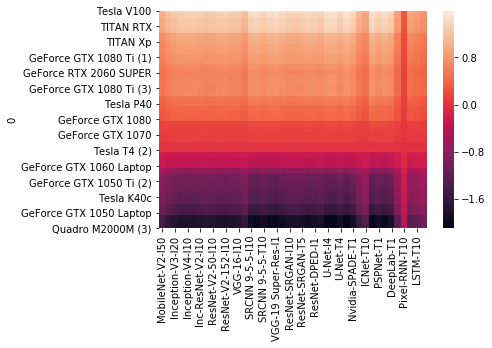

In [27]:
sns.heatmap(log_gpus_speed_reduced(1))

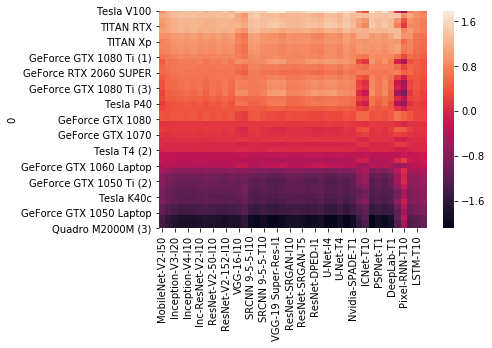

In [28]:
sns.heatmap(log_gpus_speed_reduced(2))

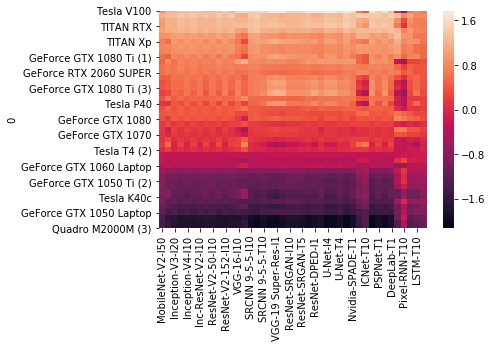

In [29]:
sns.heatmap(log_gpus_speed_reduced(3))

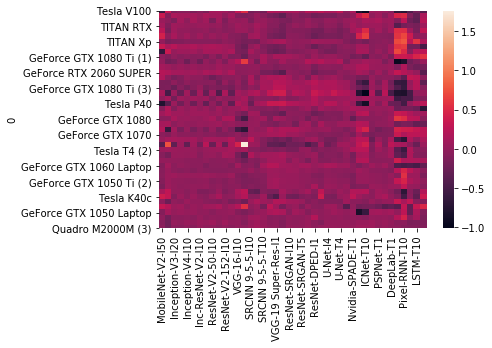

In [30]:
sns.heatmap(log_gpus_speed - log_gpus_speed_reduced(1))

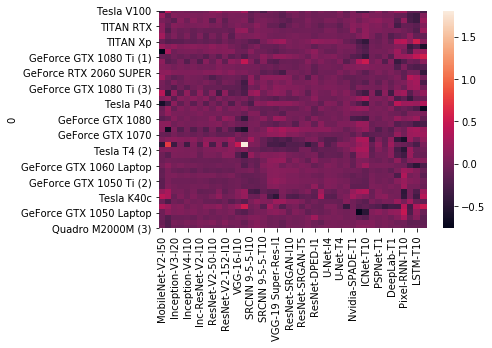

In [31]:
sns.heatmap(log_gpus_speed - log_gpus_speed_reduced(2))

In [36]:
k = 3
U, S, Vh = linalg.svd(log_gpus_speed.values)
U = U[:, :k] 
S = S[:k]
Vh = Vh[:k, :]

In [37]:
pd.DataFrame(U, index=log_gpus_speed.index)

,0,1,2
0,,,
Tesla V100,-0.216272,0.357147,0.040956
GeForce RTX 2080 Ti (1),-0.201305,-0.224229,0.087263
GeForce RTX 2080 Ti (2),-0.191583,-0.038414,0.083630
TITAN RTX,-0.193959,0.037721,0.088986
Quadro RTX 6000,-0.182509,-0.199553,0.038507
GeForce RTX 2080 SUPER,-0.147191,-0.272763,0.005874
TITAN Xp,-0.142255,-0.135357,-0.245948
GeForce RTX 2080,-0.135027,-0.193436,0.014064
GeForce RTX 2070 SUPER (1),-0.131280,-0.184921,-0.012077


In [38]:
pd.DataFrame(Vh.transpose(), index=log_gpus_speed.columns)

,0,1,2
MobileNet-V2-I50,-0.121182,-0.124562,0.054571
MobileNet-V2-T50,-0.139714,-0.044147,0.277073
Inception-V3-I20,-0.150260,-0.062485,-0.056455
Inception-V3-T20,-0.158444,-0.055708,0.097403
Inception-V4-I10,-0.157681,-0.030778,-0.045631
Inception-V4-T10,-0.158973,-0.062564,0.089140
Inc-ResNet-V2-I10,-0.155457,-0.019160,-0.033133
Inc-ResNet-V2-I8,-0.150695,-0.080717,0.116209
ResNet-V2-50-I10,-0.154356,-0.018094,-0.013887
ResNet-V2-50-T10,-0.157666,-0.057051,0.154230


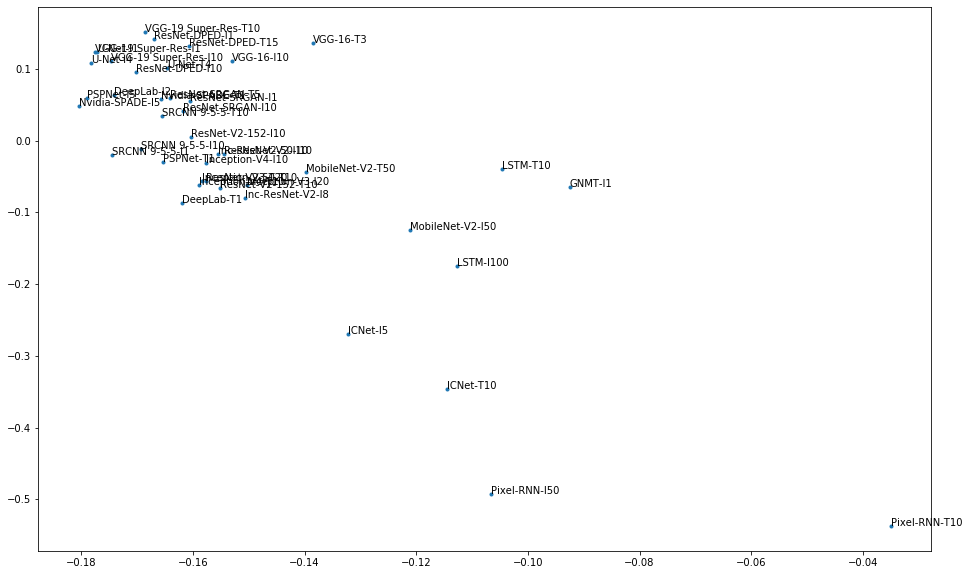

In [40]:
plt.figure(figsize=(16, 10))
plt.plot(Vh.transpose()[:, 0], Vh.transpose()[:, 1], '.')
for i, name in enumerate(log_gpus_speed.columns):
    plt.annotate(name, Vh.transpose()[i, :2])

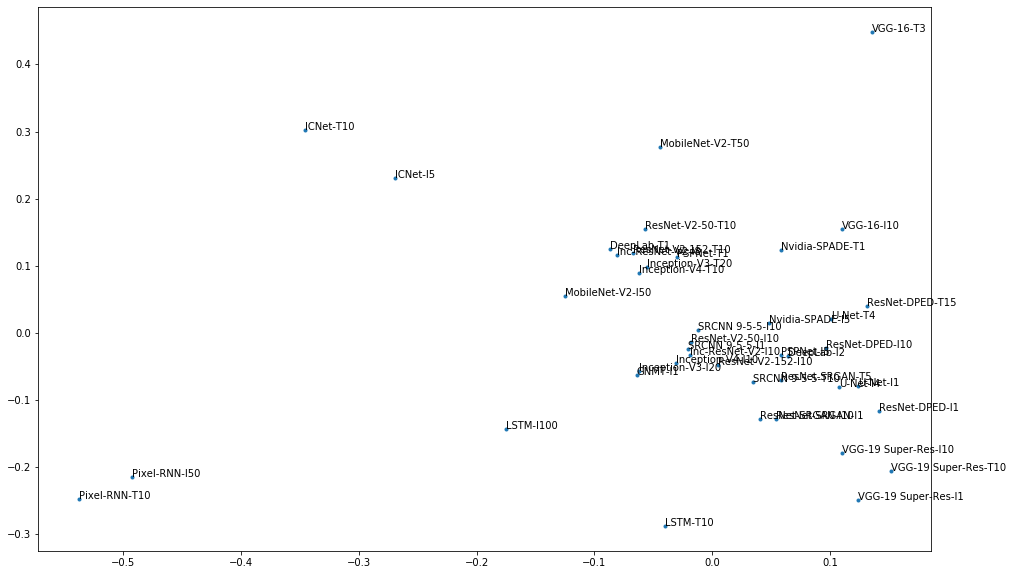

In [41]:
plt.figure(figsize=(16, 10))
plt.plot(Vh.transpose()[:, 1], Vh.transpose()[:, 2], '.')
for i, name in enumerate(log_gpus_speed.columns):
    plt.annotate(name, Vh.transpose()[i, 1:])

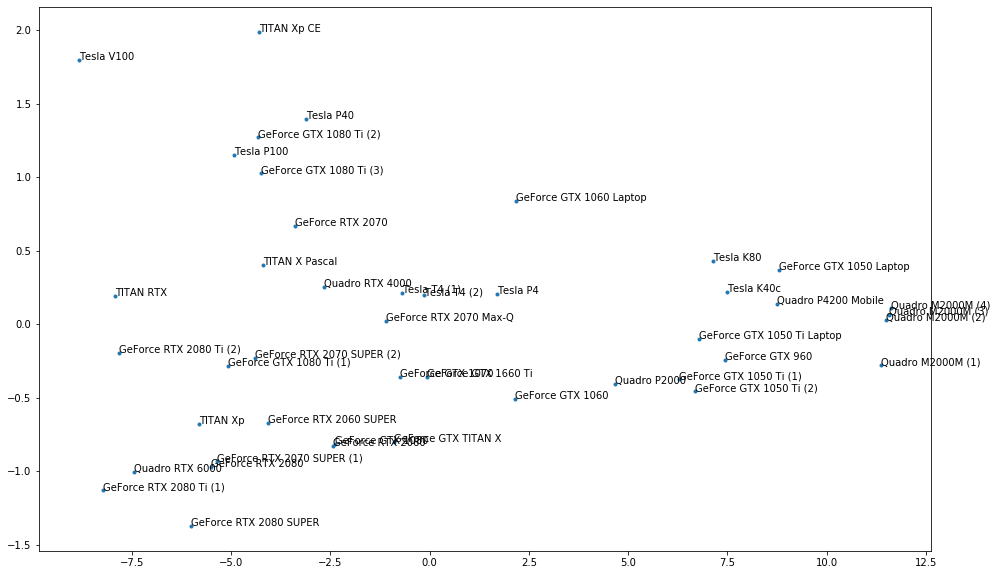

In [135]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(log_gpus_speed)

plt.figure(figsize=(16, 10))
plt.plot(X_pca[:, 0], X_pca[:, 1], '.')
for i, name in enumerate(log_gpus_speed.index):
    plt.annotate(name, X_pca[i])

In [136]:
pca.explained_variance_

array([38.75104455,  0.58795182])

In [137]:
pca.explained_variance_ratio_

array([0.96310936, 0.01461282])

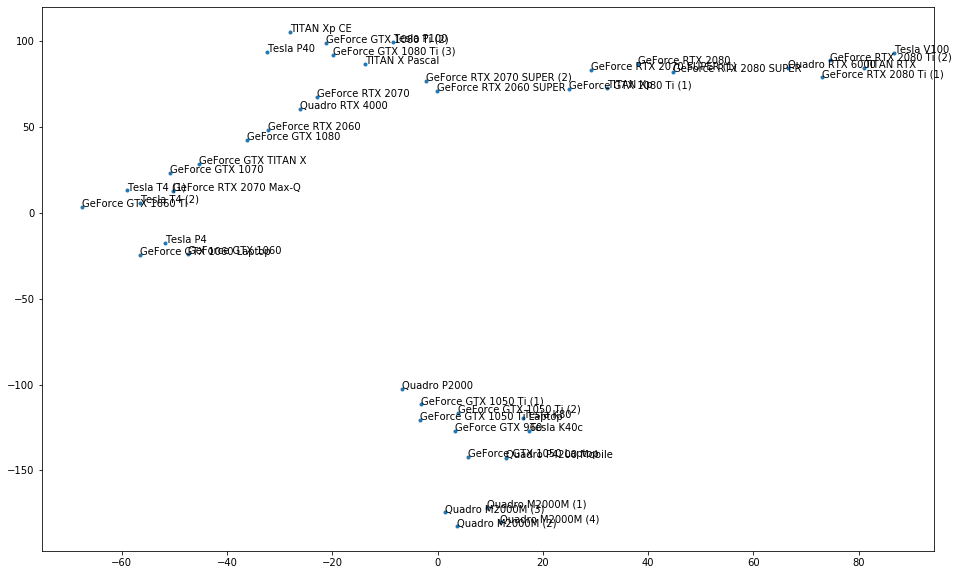

In [138]:
tsne = TSNE(n_components=2, perplexity=5.)
X_tsne = tsne.fit_transform(log_gpus_speed)

plt.figure(figsize=(16, 10))
plt.plot(X_tsne[:, 0], X_tsne[:, 1], '.')
for i, name in enumerate(log_gpus_speed.index):
    plt.annotate(name, X_tsne[i])

In [139]:
log_gpus

,MobileNet-V2-I50,MobileNet-V2-T50,Inception-V3-I20,Inception-V3-T20,Inception-V4-I10,Inception-V4-T10,Inc-ResNet-V2-I10,Inc-ResNet-V2-I8,ResNet-V2-50-I10,ResNet-V2-50-T10,...,ICNet-T10,PSPNet-I5,PSPNet-T1,DeepLab-I2,DeepLab-T1,Pixel-RNN-I50,Pixel-RNN-T10,LSTM-I100,LSTM-T10,GNMT-I1
0,,,,,,,,,,,,,,,,,,,,,
Tesla V100,5.727920,6.977280,5.614710,7.348728,5.459432,7.499846,5.832890,7.636625,4.754888,6.475733,...,9.266787,8.044394,6.820179,6.228819,6.741467,9.105909,10.684749,9.084808,9.430453,7.554589
GeForce RTX 2080 Ti (1),4.857981,7.467606,5.426265,7.266787,5.392317,7.330917,5.807355,7.434628,4.857981,6.584963,...,7.870365,8.243174,6.906891,6.442943,6.658211,8.060696,9.479780,8.816984,9.607330,7.044394
GeForce RTX 2080 Ti (2),5.209453,7.467606,5.781360,7.330917,5.584963,7.392317,5.906891,7.546894,5.169925,6.658211,...,8.303781,8.184875,6.894818,6.392317,6.754888,8.661778,9.731319,9.000000,9.682995,7.011227
TITAN RTX,5.129283,7.531381,5.554589,7.375039,5.523562,7.475733,5.857981,7.577429,5.000000,6.700440,...,8.361944,8.209453,6.965784,6.426265,6.754888,8.942515,10.184875,8.882643,9.503826,7.159871
Quadro RTX 6000,5.044394,7.658211,5.614710,7.507795,5.614710,7.599913,6.000000,7.686501,5.129283,6.820179,...,7.988685,8.375039,7.022368,6.554589,6.794416,8.076816,9.491853,8.714246,9.550747,6.977280
GeForce RTX 2080 SUPER,5.044394,7.714246,5.781360,7.721099,5.754888,7.820179,6.129283,7.942515,5.247928,7.044394,...,8.016808,8.668885,7.417853,6.832890,7.209453,8.184875,9.377211,8.592457,9.581201,7.409391
TITAN Xp,5.491853,7.882643,6.066089,7.876517,5.954196,7.912889,6.303781,8.011227,5.392317,7.159871,...,8.864186,8.741467,7.442943,6.820179,7.209453,8.082149,9.292322,8.714246,8.982994,7.238405
GeForce RTX 2080,5.209453,7.614710,5.754888,7.679480,5.781360,7.700440,6.169925,7.845490,5.209453,6.977280,...,8.614710,8.781360,7.459432,6.894818,7.108524,8.238405,9.471675,9.224002,9.776433,7.954196
GeForce RTX 2070 SUPER (1),6.209453,7.434628,6.000000,7.761551,5.882643,7.807355,6.285402,7.882643,5.285402,7.011227,...,8.603626,8.804131,7.434628,6.942515,7.098032,8.124121,9.586840,9.116344,9.359750,7.179909


Explained variance: [0.96310936 0.01461282]


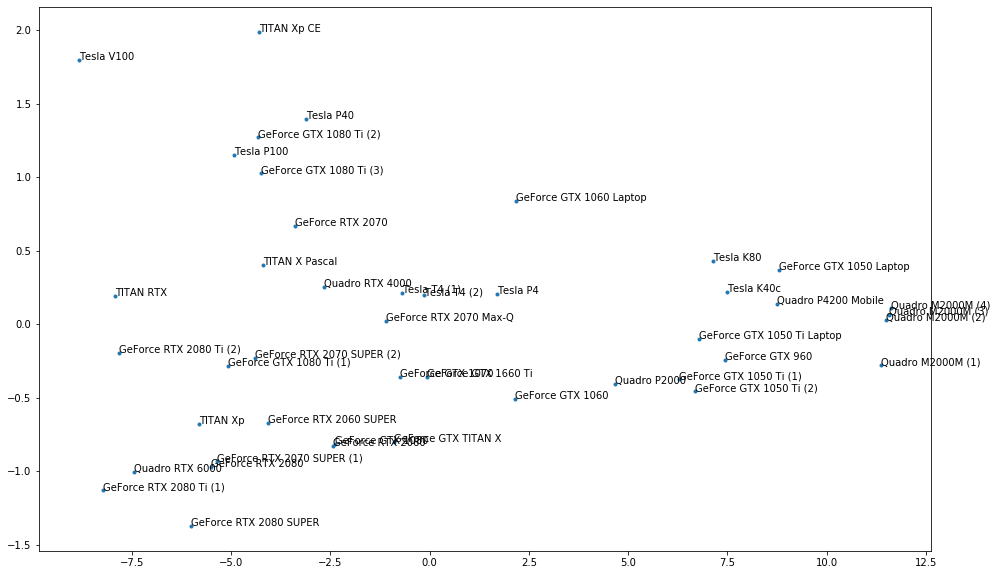

In [140]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(log_gpus)

print(f"Explained variance: {pca.explained_variance_ratio_}")

plt.figure(figsize=(16, 10))
plt.plot(X_pca[:, 0], X_pca[:, 1], '.')
for i, name in enumerate(log_gpus.index):
    plt.annotate(name, X_pca[i])

## Inception-v4 vs LSTM

In [42]:
log_gpus_speed_il = log_gpus_speed.iloc[:, [4, 5, 10, 11, 39, 40]]

In [43]:
log_gpus_speed_il

,Inception-V4-I10,Inception-V4-T10,ResNet-V2-152-I10,ResNet-V2-152-T10,LSTM-I100,LSTM-T10
0,,,,,,
Tesla V100,1.335512,1.264722,1.497191,1.352600,0.567945,0.736287
GeForce RTX 2080 Ti (1),1.402626,1.433651,1.304546,1.392401,0.835769,0.559410
GeForce RTX 2080 Ti (2),1.209981,1.372251,1.134621,1.248491,0.652753,0.483745
TITAN RTX,1.271382,1.288835,1.200209,1.221355,0.770110,0.662914
Quadro RTX 6000,1.180234,1.164655,1.134621,1.126007,0.938508,0.615993
GeForce RTX 2080 SUPER,1.040056,0.944389,1.011764,0.872792,1.060296,0.585539
TITAN Xp,0.840748,0.851679,0.926034,0.858785,0.938508,1.183746
GeForce RTX 2080,1.013584,1.064128,0.982618,0.922915,0.428751,0.390307
GeForce RTX 2070 SUPER (1),0.912301,0.957213,0.954049,0.997683,0.536409,0.806990


Explained variance: [0.97563851 0.01535099]


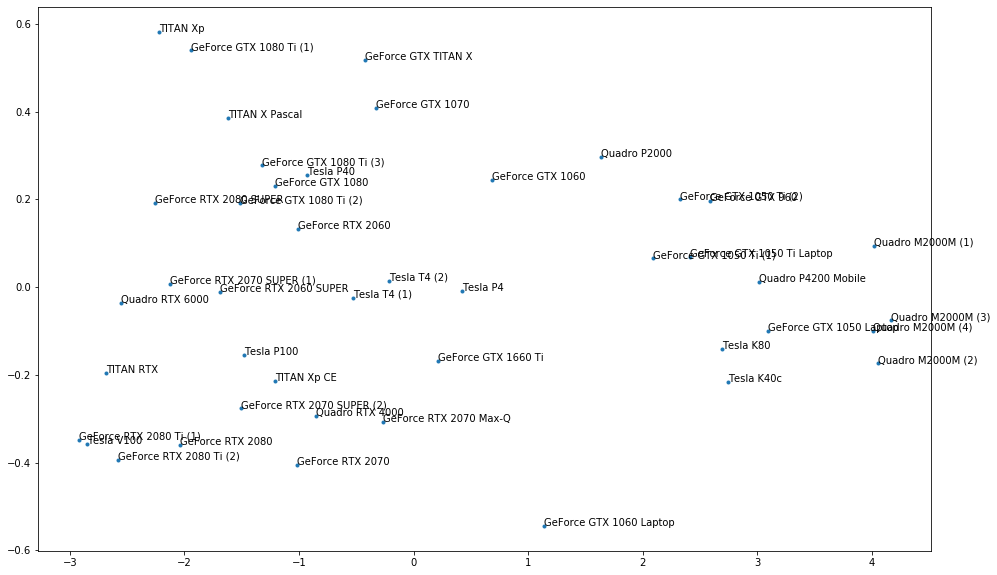

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(log_gpus_speed_il)

print(f"Explained variance: {pca.explained_variance_ratio_}")

plt.figure(figsize=(16, 10))
plt.plot(X_pca[:, 0], X_pca[:, 1], '.')
for i, name in enumerate(log_gpus_speed_il.index):
    plt.annotate(name, X_pca[i])

In [45]:
linalg.svd(log_gpus_speed_il.values)

(array([[-0.19807466, -0.19841539,  0.1978777 , ...,  0.12555725,
          0.17474076,  0.13689268],
        [-0.20293242, -0.19300704, -0.13401894, ...,  0.09295266,
          0.09869313,  0.10427212],
        [-0.17953277, -0.21835552, -0.09230935, ...,  0.14803302,
          0.12200038,  0.1741585 ],
        ...,
        [ 0.28190403, -0.09651686,  0.03898194, ...,  0.89920704,
         -0.0916344 , -0.0987791 ],
        [ 0.28931256, -0.04192505,  0.02138191, ..., -0.08108578,
          0.92055771, -0.08110454],
        [ 0.27858507, -0.05542141,  0.0147774 , ..., -0.09297868,
         -0.08703057,  0.90628029]]),
 array([14.38925754,  1.80493752,  1.10820751,  0.7219328 ,  0.36443536,
         0.1734679 ]),
 array([[-0.44747012, -0.45081165, -0.45488778, -0.44054991, -0.32457168,
         -0.30030893],
        [-0.16871587, -0.28418186, -0.15823889, -0.26702968,  0.61186516,
          0.64811438],
        [ 0.10892611, -0.13266884,  0.24919744, -0.14690045, -0.69932534,
         

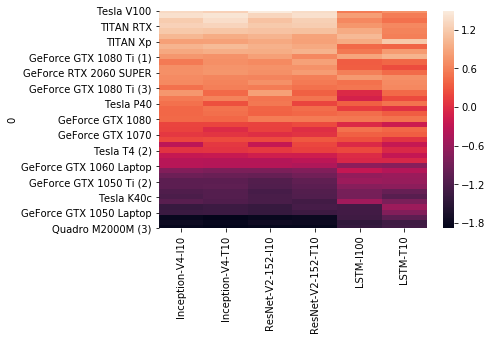

In [46]:
sns.heatmap(log_gpus_speed_il)